About the homework: In some tasks, in addition to writing code, answers to questions and conclusions are required (there are special Markdown cells marked with **Answer**).

The ability to analyze the results of experiments is an important skill. Therefore, answers carry more weight than the code: the code accounts for 30% of the task grade, while answers to questions account for 70%.

**Reminder:** Plagiarism is prohibited. Use of AI without mentioning how and in which parts it was used is also prohibited. If plagiarism or dishonest use of AI is revealed, the assignment is graded with 0.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Let's work with data about students.

In [2]:
!wget https://raw.githubusercontent.com/Majid-Sohrabi/DAM-2024/refs/heads/main/07-trees/students.csv

--2024-12-05 21:43:29--  https://raw.githubusercontent.com/Majid-Sohrabi/DAM-2024/refs/heads/main/07-trees/students.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 126614 (124K) [text/plain]
Saving to: ‘students.csv’

students.csv        100%[===================>] 123.65K  --.-KB/s    in 0.02s   

2024-12-05 21:43:29 (4.86 MB/s) - ‘students.csv’ saved [126614/126614]



In [3]:
df = pd.read_csv('students.csv')

df.sample(4)

,ID,Performance Index,Previous Scores (out of 10),Sample Question Papers Practiced,Hours Studied,Hours Prepared for Exams,Hours Free time,Sleep Hours,Hours Not Sleep,Extracurricular Activities,Has a car,Sex,Height,Weight,BMI,Eye color,Nails length,Favorite Subject,Least Favorite Subject
692,693,54.0,7,7,1,1,8,9,15,No,Yes,f,1.619215,83.858633,31.984442,brown,0.004304,History,NaN
362,363,80.0,7,7,8,3,9,4,20,Yes,No,m,1.730273,60.195918,20.106564,green,0.003918,Biology,Machine Learning
788,789,69.0,7,4,5,2,7,4,20,Yes,No,m,1.781991,73.105027,23.021627,brown,0.006076,Machine Learning,Art
200,201,34.0,6,1,2,1,9,9,15,No,No,m,1.719986,72.888406,24.638184,gray,0.008830,Music,NaN


We will predict their performance index.

In [4]:
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

# Task 1 (2 points)

Let's try to propose hypothesis, which features will be the most useful.

For every feature $x^j$:

*   Draw a plot of $x^j$ and target (scatter plot, if feature is numerical and boxplot if the feature is categorical)
*   Compute correlation of  $x^j$ and target if the feature is numerical.



Draw conclusions: which features seems to be the most important? Which do not seem useful? Is it logical?

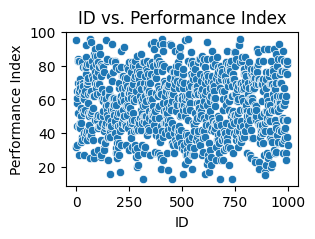

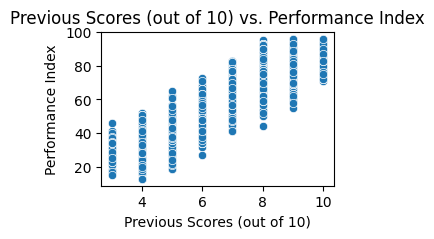

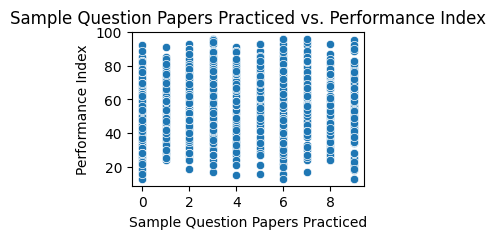

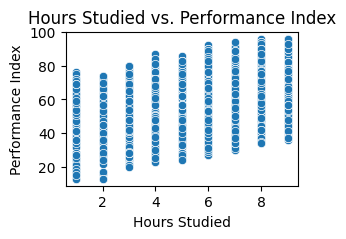

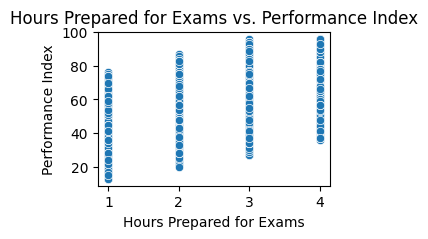

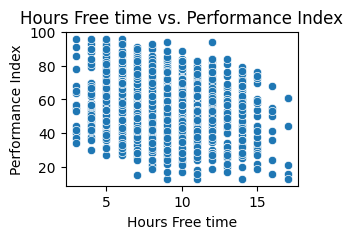

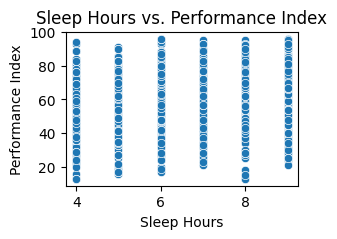

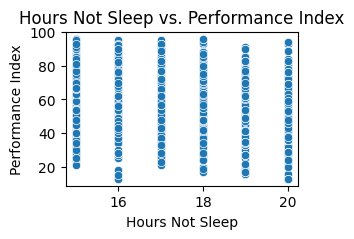

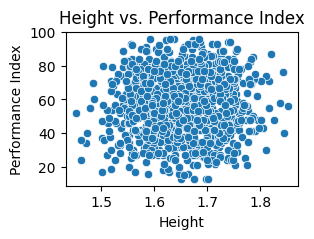

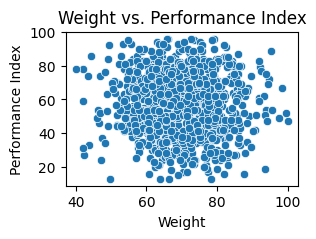

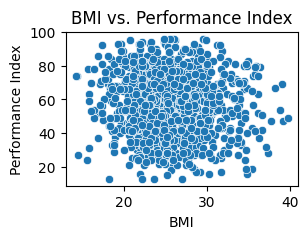

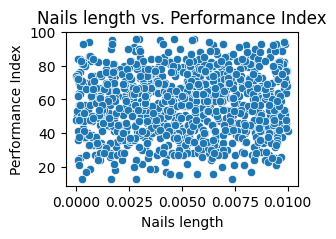

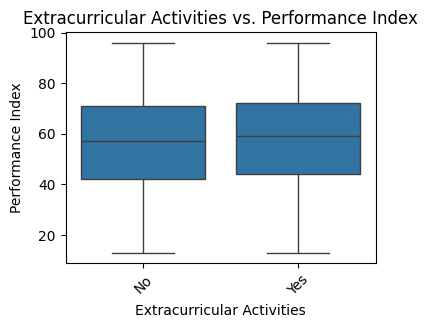

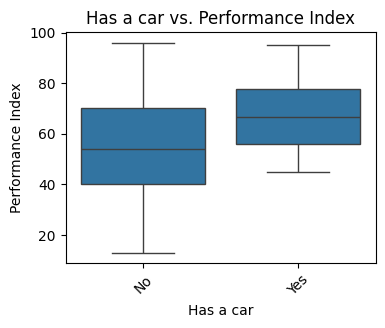

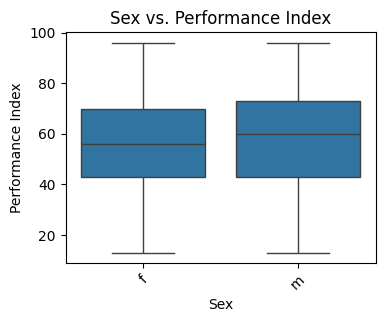

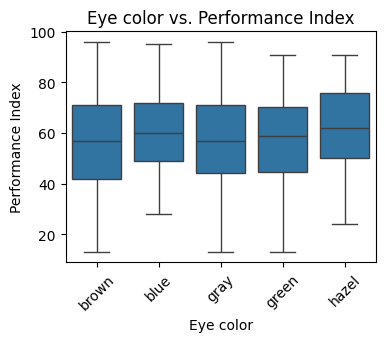

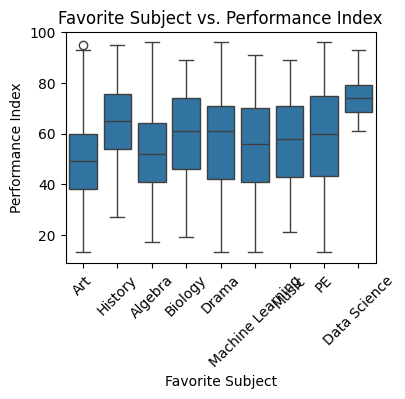

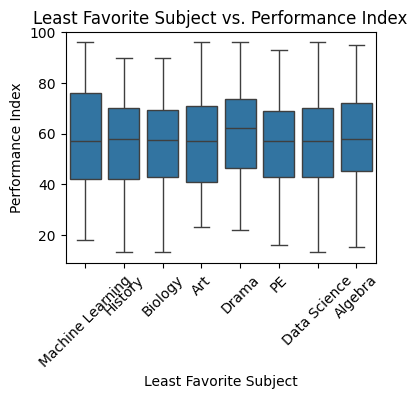

{'ID': -0.03469174624558021,
 'Previous Scores (out of 10)': 0.8601779076793713,
 'Sample Question Papers Practiced': 0.012085386756910442,
 'Hours Studied': 0.31695547707885646,
 'Hours Prepared for Exams': 0.297520775086402,
 'Hours Free time': -0.23752248249820743,
 'Sleep Hours': 0.05080718527867442,
 'Hours Not Sleep': -0.05080718527867434,
 'Height': 0.048732007197612254,
 'Weight': -0.041138830932092085,
 'BMI': -0.0604090188249479,
 'Nails length': 0.03630874237761241}

In [8]:
#YOUR CODE
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Analyze features and their relationship with the target (Performance Index)

# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove the target variable from numerical features list
numerical_features.remove('Performance Index')

# Plot and calculate correlation for numerical features
correlations = {}
for feature in numerical_features:
    # Scatter plot
    plt.figure(figsize=(3, 2))
    sns.scatterplot(x=df[feature], y=df['Performance Index'])
    plt.title(f'{feature} vs. Performance Index')
    plt.xlabel(feature)
    plt.ylabel('Performance Index')
    plt.show()

    # Calculate correlation
    correlation = df[feature].corr(df['Performance Index'])
    correlations[feature] = correlation

# Plot for categorical features
for feature in categorical_features:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=df[feature], y=df['Performance Index'])
    plt.title(f'{feature} vs. Performance Index')
    plt.xlabel(feature)
    plt.ylabel('Performance Index')
    plt.xticks(rotation=45)
    plt.show()

# Display the correlations for numerical features
correlations


**Answer** \#YOUR ANSWER

The analysis shows that **Previous Scores (out of 10)** with the most significant feature. It has avery  strong positive correlation to `Performance Index`. Study-related features like **Hours Studied** and **Hours Prepared for Exams** are important and neccessary in a moderate manner, while for excessive **Free Time** it affects performance negatively. Some Features like **Sleep Hours**, **BMI**, and **Eye Color** are not relevant due to lack of logical connections to academic success. In conclusion, the key predictors are academic effort and previous performance.


# Task 2 (3 points)

Split data into train and test. Set `test_size=0.3, random_state=0`

In [10]:
from sklearn.model_selection import train_test_split

#YOUR CODE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



Preprocess the data:


*   Depict number of missing values in every column, replace missing values with median, computed on train data (numerical features) or with 'Not Given' (categorical features)
*   Encode the categorical with one-hot-encoder



In [19]:
values = {
    **{col: X_train[col].median() for col in X_train.select_dtypes(include=["float64", "int64"]).columns},
    **{col: "Not Given" for col in X_train.select_dtypes(include=["object"]).columns}
          }
X_test.fillna(values, inplace=True)
X_train.fillna(values, inplace=True)

# One-hot encode categorical features
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

Train linear regression without regularization, compute MSE on train and test data.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#YOUR CODE

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_encoded, y_train)

# Predict on train and test data
y_train_pred = lr_model.predict(X_train_encoded)
y_test_pred = lr_model.predict(X_test_encoded)

# Compute MSE for train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the results
print(f"Mean Squared Error on Train Data: {mse_train:.2f}")
print(f"Mean Squared Error on Test Data: {mse_test:.2f}")


Mean Squared Error on Train Data: 34.33
Mean Squared Error on Test Data: 37.63


# Task 3 (3 points)

Investigate the coefficients of the model. Why are they so big/small? Can the absolute value of the coefficitnt be used as a measure of importance of the feature? Why/why not?

In [26]:
#YOUR CODE
# The coefficients of the trained model
coefficients = lr_model.coef_
feature_names = X_train_encoded.columns

# Combine feature names with their respective coefficients
coefficients_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

coefficients_df["Absolute Coefficient"] = coefficients_df["Coefficient"].abs()
coefficients_df = coefficients_df.sort_values(by="Absolute Coefficient", ascending=False)

coefficients_df


,Feature,Coefficient,Absolute Coefficient
0,Previous Scores (out of 10),8.868717,8.868717
1,Hours Studied,2.651382,2.651382
2,Hours Prepared for Exams,0.232657,0.232657
3,Hours Free time,-0.181301,0.181301


**Answer** \#YOUR ANSWER

But why are the coefficients so big or so small?

The size of the coefficients is depends on the scale of the features.A solid  example is the coefficient of a feature like “Hours Free Time” is (-0.18) versus “Previous Scores (out of 10)” has much higher coefficient of (8.87). because the range of “Previous Scores” is larger. Therefore, a change in the range of numbers  will translate into greater variation in the aspect of (Performance Index). Also, coefficients with those features with smaller ranges or weaker relationship to target are smaller.

Is the absolute value of coefficients a measure of feature importance?
The answer to this question is that absolute value of coefficients are not able to identify and detect feature importance reliably without taking into  consideration the scales of the features..

Draw conclusions about the model and important features and explain if it is logical. If it cannot be done right now, tackle the problem.

In [28]:
from sklearn.preprocessing import StandardScaler
#YOUR CODE
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

**Answer** \#YOUR ANSWER

# Task 3 (3 points)

For different `alpha` hyperparameter fit linear regression with $L_1$ regularization (`Lasso` model, if there are warnings - set `tol=0.1`).

Choose the grid in such way that the smallest alpha will result in 0-5 zero coefficent and for biggest - all coefficient will be 0.

For every model save number of zero coefficients and MSE on train and test data

In [30]:
from sklearn.linear_model import Lasso
alphas = np.logspace(-3, 2, 20)

# Initialize lists to store results
zero_coefficients = []
mse_train_lasso = []
mse_test_lasso = []

# Loop through the alpha values
for alpha in alphas:
    # Fit Lasso model with the specified alpha and tolerance
    lasso_model = Lasso(alpha=alpha, tol=0.1, random_state=42, max_iter=10000)
    lasso_model.fit(X_train_encoded, y_train)

    # Count zero coefficients
    zero_count = np.sum(lasso_model.coef_ == 0)
    zero_coefficients.append(zero_count)

    # Evaluate the model on train and test sets
    y_train_pred = lasso_model.predict(X_train_encoded)
    y_test_pred = lasso_model.predict(X_test_encoded)
    mse_train_lasso.append(mean_squared_error(y_train, y_train_pred))
    mse_test_lasso.append(mean_squared_error(y_test, y_test_pred))

# Combine the results into a DataFrame for easy analysis
lasso_results = pd.DataFrame({
    "Alpha": alphas,
    "Zero Coefficients": zero_coefficients,
    "MSE Train": mse_train_lasso,
    "MSE Test": mse_test_lasso
})

lasso_results.head()

,Alpha,Zero Coefficients,MSE Train,MSE Test
0,0.001000,0,34.342632,37.693814
1,0.001833,0,34.342475,37.693629
2,0.003360,0,34.342194,37.693296
3,0.006158,0,34.341695,37.692703
4,0.011288,0,34.340842,37.691674


Draw 2 plots near each other: number of zero coefficients and  MSE (both train and test on one plot).  Draw conclusions: compare the MSE of Lasso and initial linear regression, investigate the importance of features in the new model (which are non-zero?).

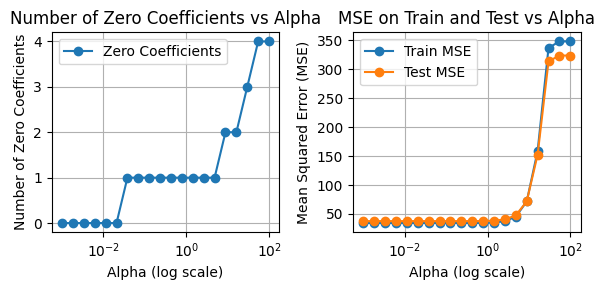

In [33]:
#YOUR CODE
import matplotlib.pyplot as plt

# Create a figure for the two plots
plt.figure(figsize=(6, 3))

# Plot 1: Number of zero coefficients vs Alpha
plt.subplot(1, 2, 1)
plt.plot(lasso_results["Alpha"], lasso_results["Zero Coefficients"], marker='o', label="Zero Coefficients")
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Number of Zero Coefficients")
plt.title("Number of Zero Coefficients vs Alpha")
plt.grid(True)
plt.legend()

# Plot 2: MSE on Train and Test vs Alpha
plt.subplot(1, 2, 2)
plt.plot(lasso_results["Alpha"], lasso_results["MSE Train"], marker='o', label="Train MSE")
plt.plot(lasso_results["Alpha"], lasso_results["MSE Test"], marker='o', label="Test MSE")
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE on Train and Test vs Alpha")
plt.grid(True)
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

# Investigate non-zero coefficients for the smallest alpha
lasso_model_small_alpha = Lasso(alpha=alphas[0], tol=0.1, random_state=42, max_iter=10000)
lasso_model_small_alpha.fit(X_train_encoded, y_train)

# Identify features with non-zero coefficients
non_zero_features = X_train_encoded.columns[lasso_model_small_alpha.coef_ != 0]
non_zero_coefficients = lasso_model_small_alpha.coef_[lasso_model_small_alpha.coef_ != 0]

# Create a DataFrame of non-zero features and their coefficients
non_zero_features_df = pd.DataFrame({
    "Feature": non_zero_features,
    "Coefficient": non_zero_coefficients
}).sort_values(by="Coefficient", ascending=False)


**Answer** \#YOUR ANSWER

The Lasso regression lay emphasis on interesting insights about the behaviour of the model and how important the features are. Lasso progressively shrinks less important coefficients to zero as there is a steady increase in regularization parameter to a similar effect to the feature selection performed by Lasso. The characteristic of this problem is that it facilitates greatly in Lasso identification of most influential predictors while shrinking the model complexity.

# Task 4 (2 points)

Now, use $L_2$ regularization. Tune hyperparameters of `Ridge` model  using cross-validation. Report the best MSE on test data.  

In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {'alpha': np.logspace(-12, 10, 50)}  # Wide range of alpha values

# Initialize the Ridge model
ridge_model = Ridge(random_state=42, max_iter=10000)

# Perform cross-validation to tune the hyperparameters
ridge_search = GridSearchCV(ridge_model, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
ridge_search.fit(X_train_encoded, y_train)

# Retrieve the best parameters and the corresponding model
best_ridge_alpha = ridge_search.best_params_['alpha']
best_ridge_model = ridge_search.best_estimator_

# Evaluate the best Ridge model on test data
y_test_pred_ridge = best_ridge_model.predict(X_test_encoded)
ridge_test_mse = mean_squared_error(y_test, y_test_pred_ridge)

# Display the results
print(f"Best Alpha: {best_ridge_alpha}")
print(f"Test MSE: {ridge_test_mse}")


Best Alpha: 3.727593720314938
Test MSE: 37.62803378178822


Investigate coefficients: how many zeros? Which features are important?

In [36]:
#YOUR CODE
# Retrieve the coefficients of the best Ridge model
ridge_coefficients = best_ridge_model.coef_
feature_names = X_train_encoded.columns if isinstance(X_train_encoded, pd.DataFrame) else [f"Feature_{i}" for i in range(len(ridge_coefficients))]

# Combine feature names and their coefficients
ridge_coefficients_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": ridge_coefficients,
    "Absolute Coefficient": np.abs(ridge_coefficients)
}).sort_values(by="Absolute Coefficient", ascending=False)

# Count how many coefficients are effectively zero (or close to zero)
zero_like_count = np.sum(np.abs(ridge_coefficients) < 1e-5)

# Display important features
print(f"Number of coefficients close to zero: {zero_like_count}")
print("\nTop features by importance:")
print(ridge_coefficients_df.head())

# Optionally display the entire coefficient table
ridge_coefficients_df


Number of coefficients close to zero: 0

Top features by importance:
                       Feature  Coefficient  Absolute Coefficient
0  Previous Scores (out of 10)     8.854964              8.854964
1                Hours Studied     2.629700              2.629700
2     Hours Prepared for Exams     0.279517              0.279517
3              Hours Free time    -0.184151              0.184151


,Feature,Coefficient,Absolute Coefficient
0,Previous Scores (out of 10),8.854964,8.854964
1,Hours Studied,2.629700,2.629700
2,Hours Prepared for Exams,0.279517,0.279517
3,Hours Free time,-0.184151,0.184151


**Answer** \#YOUR ANSWER

In Ridge regression model all the features remains the same and they are retained. All coefficients are non zero. The most important features are **Previous Scores (out of 10)** (coefficient: 8.This analysis shows that **Hours Studied** (with coefficient 2.63) and **Hours Reported** (with coefficient 2.63) have strong impact on performance. **Hours Prepared for Exams** (0.28) also adds up favourably and **Hours Free Time** (-0.18) has also a slightly adverse effect. Feature contributions balance but do not eliminate any by taking into consideration the great importance of academic effort and past success. These are logical and conformal to expectation.